In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced visualizations

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# TensorFlow imports (for Neural Networks)
import tensorflow as tf

# Suppress warnings (optional, for cleaner output)
import warnings
warnings.filterwarnings('ignore')


Loading the impure dataset and making a different CSV file for standard deviation values

In [ ]:
# Load the impure data
impure_data = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_NaN.csv')

# Display the statistical description of the data
impure_data.describe()

# Replace NaN with the standard deviation value in each numerical column
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

for col in numerical_cols:
    std_value = impure_data[col].std(skipna=True)  # Calculate std excluding NaN
    impure_data[col].fillna(std_value, inplace=True)

# Save the cleaned data with NaNs replaced by std values
cleaned_data_path = r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\Data_std.csv'
impure_data.to_csv(cleaned_data_path, index=False)

# Display the cleaned data
print("Sample Cleaned Data:")
print(impure_data.head())


Sample Cleaned Data:
         date  precipitation   temp_max  temp_min  wind  weather
0         NaN       6.574608  12.800000       5.0   4.7  drizzle
1  2012-01-02      10.900000   7.338485       2.8   4.5     rain
2  2012-01-03       0.800000  11.700000       7.2   2.3      NaN
3  2012-01-04      20.300000  12.200000       5.6   4.7     rain
4         NaN       1.300000   8.900000       2.8   6.1     rain


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model Comparison Results:
                        MAE       MSE  R2 Score
Linear Regression  0.546854  0.566928  0.454629
Neural Network     0.523077  0.558199  0.463026
Decision Tree      0.661123  0.866475  0.166472
Random Forest      0.558466  0.636705  0.387505
SVM                0.515065  0.575624  0.446263
Gradient Boosting  0.511733  0.527082  0.492959


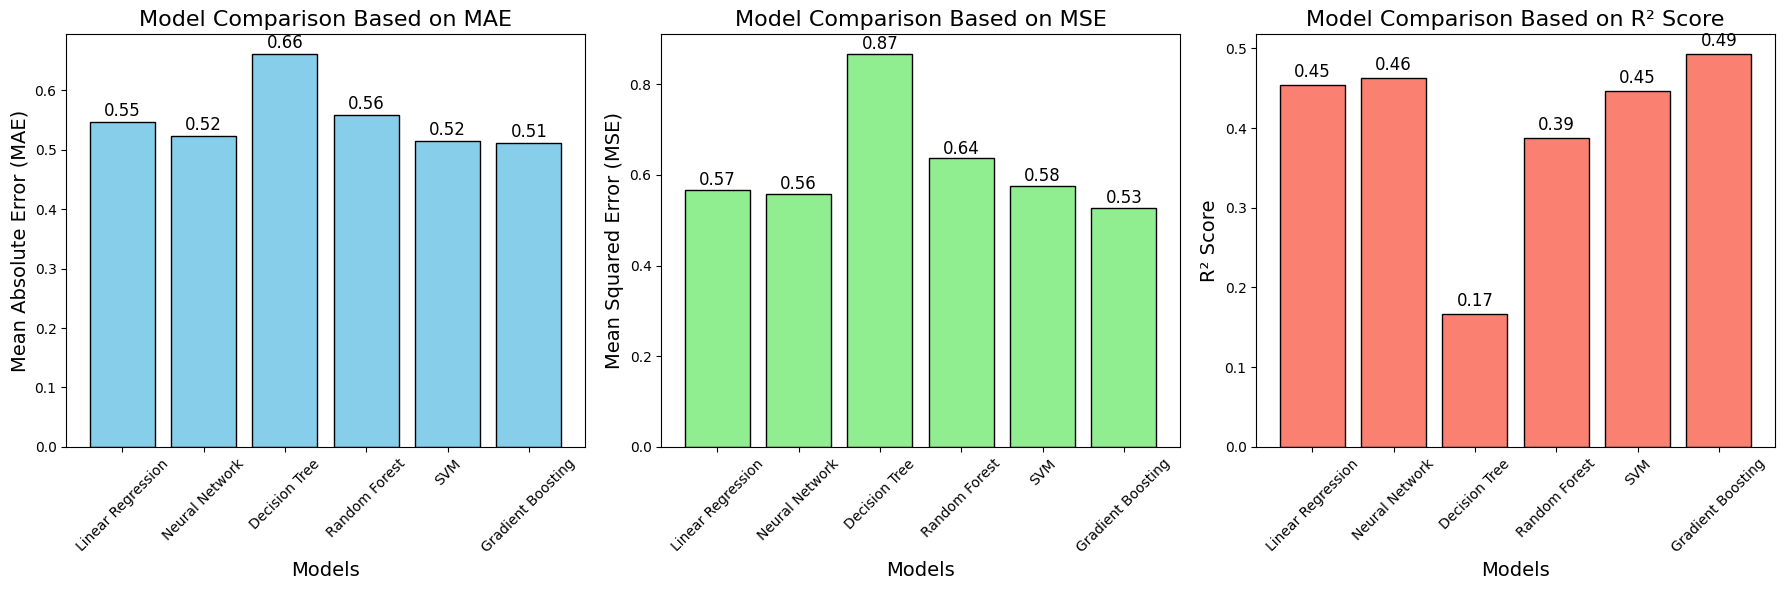


Best Model in comparison to MAE (minimized): Gradient Boosting
Performance Comparison: 
MAE         0.511733
MSE         0.527082
R2 Score    0.492959
Name: Gradient Boosting, dtype: float64

Best Model in comparison to MSE (minimized): Gradient Boosting
Performance Comparison: 
MAE         0.511733
MSE         0.527082
R2 Score    0.492959
Name: Gradient Boosting, dtype: float64

Best Model in comparison to R² Score (maximized): Gradient Boosting
Performance Comparison: 
MAE         0.511733
MSE         0.527082
R2 Score    0.492959
Name: Gradient Boosting, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

# Assuming impure_data and numerical_cols are predefined
scaler = StandardScaler()
standardized_data = impure_data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(impure_data[numerical_cols])

# Prepare features and target
X = standardized_data[['temp_min', 'precipitation', 'wind']].values
y = standardized_data['temp_max'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train models
results = {}  # Store results for each model

# 1. Linear Regression
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)
y_pred_lr = regressor_lr.predict(X_test)
results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr),
}

# 2. Neural Network
model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_nn.fit(X_train, y_train, epochs=50, verbose=0, batch_size=16)
y_pred_nn = model_nn.predict(X_test).flatten()
results['Neural Network'] = {
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'R2 Score': r2_score(y_test, y_pred_nn),
}

# 3. Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)
y_pred_dt = regressor_dt.predict(X_test)
results['Decision Tree'] = {
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt),
}

# 4. Random Forest
regressor_rf = RandomForestRegressor(random_state=42, n_estimators=100)
regressor_rf.fit(X_train, y_train)
y_pred_rf = regressor_rf.predict(X_test)
results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf),
}

# 5. Support Vector Machine
regressor_svm = SVR()
regressor_svm.fit(X_train, y_train)
y_pred_svm = regressor_svm.predict(X_test)
results['SVM'] = {
    'MAE': mean_absolute_error(y_test, y_pred_svm),
    'MSE': mean_squared_error(y_test, y_pred_svm),
    'R2 Score': r2_score(y_test, y_pred_svm),
}

# 6. Gradient Boosting
regressor_gb = GradientBoostingRegressor(random_state=42)
regressor_gb.fit(X_train, y_train)
y_pred_gb = regressor_gb.predict(X_test)
results['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2 Score': r2_score(y_test, y_pred_gb),
}

# Step 3: Compare results
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

# Step 4: Plot Bar charts for MAE, MSE, and R² Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
mae_values = [results[model]['MAE'] for model in results]
axes[0].bar(results.keys(), mae_values, color='skyblue', edgecolor='black')
axes[0].set_title('Model Comparison Based on MAE', fontsize=16)
axes[0].set_xlabel('Models', fontsize=14)
axes[0].set_ylabel('Mean Absolute Error (MAE)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
mse_values = [results[model]['MSE'] for model in results]
axes[1].bar(results.keys(), mse_values, color='lightgreen', edgecolor='black')
axes[1].set_title('Model Comparison Based on MSE', fontsize=16)
axes[1].set_xlabel('Models', fontsize=14)
axes[1].set_ylabel('Mean Squared Error (MSE)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Plot R² Score
r2_values = [results[model]['R2 Score'] for model in results]
axes[2].bar(results.keys(), r2_values, color='salmon', edgecolor='black')
axes[2].set_title('Model Comparison Based on R² Score', fontsize=16)
axes[2].set_xlabel('Models', fontsize=14)
axes[2].set_ylabel('R² Score', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)

# Annotate bars with the values
for ax, values in zip(axes, [mae_values, mse_values, r2_values]):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Step 5: Print Best Model based on MAE, MSE, and R² Score
best_model_mae = results_df['MAE'].idxmin()  # Best for MAE (minimize)
best_model_mse = results_df['MSE'].idxmin()  # Best for MSE (minimize)
best_model_r2 = results_df['R2 Score'].idxmax()  # Best for R² Score (maximize)

# Display the best model with all comparison metrics (MAE, MSE, R² Score)
print(f"\nBest Model in comparison to MAE (minimized): {best_model_mae}")
print(f"Performance Comparison: \n{results_df.loc[best_model_mae]}")
print(f"\nBest Model in comparison to MSE (minimized): {best_model_mse}")
print(f"Performance Comparison: \n{results_df.loc[best_model_mse]}")
print(f"\nBest Model in comparison to R² Score (maximized): {best_model_r2}")
print(f"Performance Comparison: \n{results_df.loc[best_model_r2]}")


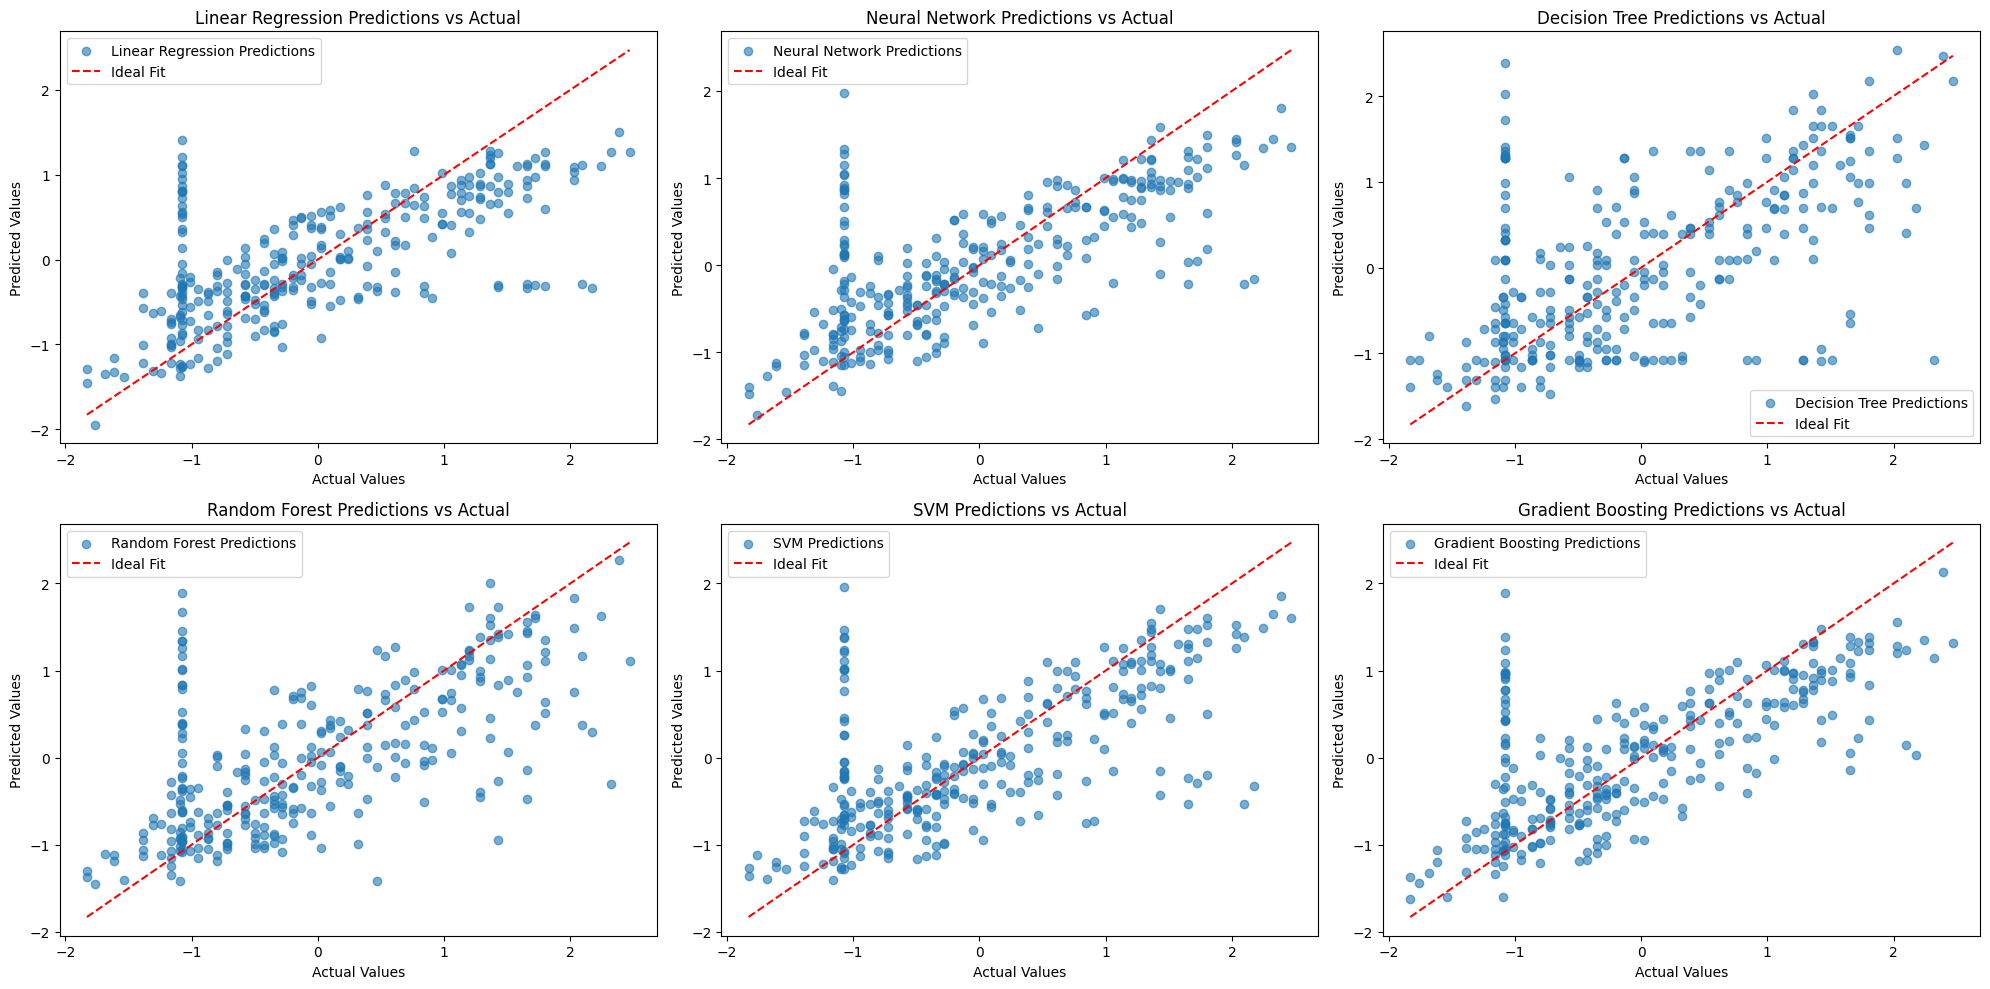


Best Model:
Model: Gradient Boosting
MAE         0.511733
MSE         0.527082
R2 Score    0.492959
Name: Gradient Boosting, dtype: float64


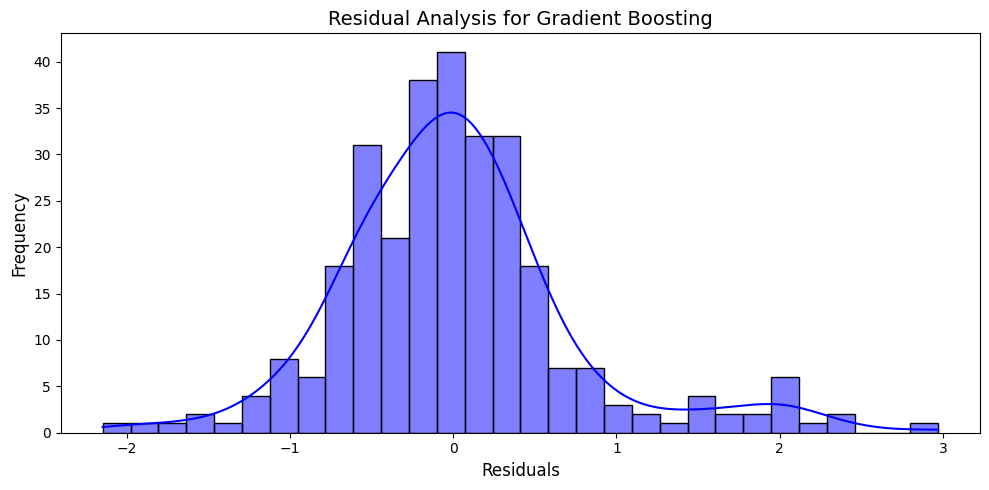

In [6]:
import seaborn as sns

# Step 1: Compare Predicted vs Actual Values for Each Model
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Neural Network': y_pred_nn,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'Gradient Boosting': y_pred_gb
})

# Step 2: Plot Predicted vs Actual Values for Each Model
plt.figure(figsize=(20, 10))

models = ['Linear Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
for i, model in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.scatter(comparison_df['Actual'], comparison_df[model], alpha=0.6, label=f'{model} Predictions')
    plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             [comparison_df['Actual'].min(), comparison_df['Actual'].max()],
             color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'{model} Predictions vs Actual', fontsize=12)
    plt.xlabel('Actual Values', fontsize=10)
    plt.ylabel('Predicted Values', fontsize=10)
    plt.legend()
    plt.tight_layout()

plt.show()

# Step 3: Identify the Best Model
best_model_name = results_df['MAE'].idxmin()
print("\nBest Model:")
print(f"Model: {best_model_name}")
print(results_df.loc[best_model_name])

# Additional Evaluation: Residual Analysis for the Best Model
best_model_predictions = comparison_df[best_model_name]
residuals = best_model_predictions - comparison_df['Actual']

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title(f'Residual Analysis for {best_model_name}', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()
